In [171]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import defaultdict, Counter
from matplotlib.pyplot import plot
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVR
from sklearn import svm
from sklearn.svm import SVC
import seaborn as sns
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [109]:
cols = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

In [110]:
data = pd.read_csv('german.data', names = cols, delimiter=' ')
data.head()

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   existingchecking       1000 non-null   object
 1   duration               1000 non-null   int64 
 2   credithistory          1000 non-null   object
 3   purpose                1000 non-null   object
 4   creditamount           1000 non-null   int64 
 5   savings                1000 non-null   object
 6   employmentsince        1000 non-null   object
 7   installmentrate        1000 non-null   int64 
 8   statussex              1000 non-null   object
 9   otherdebtors           1000 non-null   object
 10  residencesince         1000 non-null   int64 
 11  property               1000 non-null   object
 12  age                    1000 non-null   int64 
 13  otherinstallmentplans  1000 non-null   object
 14  housing                1000 non-null   object
 15  existingcredits       

In [9]:
print(pd.unique(data['credithistory']))

['A34' 'A32' 'A33' 'A30' 'A31']


In [176]:
data.head()

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,1,6,4,3,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,1
1,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,0
2,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,1
3,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,1
4,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,0


In [127]:
# data['existingchecking'] = data['existingchecking'].map({'A11':1, 'A12':2, 'A13':3, 'A14':4})
# data['credithistory'] = data['credithistory'].map({'A30':0, 'A31':1, 'A32':2, 'A33':3, 'A34':4})
# data['purpose'] = data['purpose'].map({'A40':0, 'A41':1, 'A42':2, 'A43':3, 'A44':4, 'A45':5, 'A46':6, 'A47':7, 'A48':8, 'A49':9, 'A410':10})
# data['savings'] = data['savings'].map({'A61':1, 'A62':2, 'A63':3, 'A64':4, 'A65':5})
# data['employmentsince'] = data['employmentsince'].map({'A71':1, 'A72':2, 'A73':3, 'A74':4, 'A75':5})
# data['statussex'] = data['statussex'].map({'A91':1, 'A92':2, 'A93':3, 'A94':4})
# data['otherdebtors'] = data['otherdebtors'].map({'A101':1, 'A102':2, 'A103':3})
# data['property'] = data['property'].map({'A121':1, 'A122':2, 'A123':3, 'A124':4})
# data['otherinstallmentplans'] = data['otherinstallmentplans'].map({'A141':1, 'A142':2, 'A143':3})
# data['housing'] = data['housing'].map({'A151':1, 'A152':2, 'A153':3})
# data['job'] = data['job'].map({'A171':1, 'A172':2, 'A173':3, 'A174':4})
# data['telephone'] = data['telephone'].map({'A191':1, 'A192':2})
# data['foreignworker'] = data['foreignworker'].map({'A201':1, 'A202':2})
# data['classification'] = data['classification'].map({1:1, 2:0})

In [188]:
# target variable selection

X = data.iloc[:,0:20] 
y = data.iloc[:,-1] 

X.head()
# y.head()

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,residencesince,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker
0,1,6,4,3,1169,5,5,4,3,1,4,1,67,3,2,2,3,1,2,1
1,2,48,2,3,5951,1,3,2,2,1,2,1,22,3,2,1,3,1,1,1
2,4,12,4,6,2096,1,4,2,3,1,3,1,49,3,2,1,2,2,1,1
3,1,42,2,2,7882,1,4,2,3,3,4,2,45,3,3,1,3,2,1,1
4,1,24,3,0,4870,1,3,3,3,1,4,4,53,3,3,2,3,2,1,1


# Feature importance

In [189]:
# feature importance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

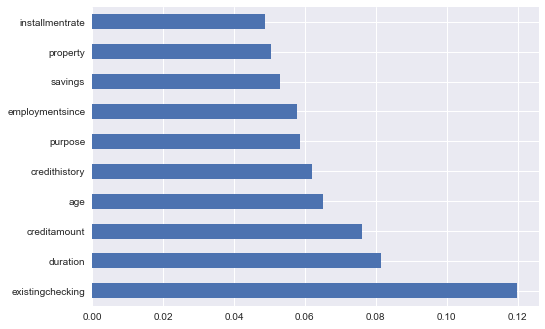

In [190]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Training the model

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.head()

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,residencesince,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker
687,2,36,3,0,2862,2,5,4,3,1,3,4,30,3,3,1,3,1,1,1
500,1,24,2,0,3123,1,2,4,2,1,1,2,27,3,2,1,3,1,1,1
332,2,60,2,0,7408,2,2,4,2,1,2,2,24,3,2,1,4,1,1,1
979,2,15,1,0,1264,2,3,2,4,1,2,2,25,3,1,1,3,1,1,1
817,4,6,4,3,1554,1,4,1,2,1,2,3,24,3,1,2,3,1,2,1


In [192]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[-0.45207661  1.26614168  0.40940737 ... -0.42214126 -0.83577138
  -0.19044535]
 [-1.24693657  0.27024163 -0.50546943 ... -0.42214126 -0.83577138
  -0.19044535]
 [-0.45207661  3.25794179 -0.50546943 ... -0.42214126 -0.83577138
  -0.19044535]
 ...
 [ 1.13764333 -0.97463344 -0.50546943 ... -0.42214126 -0.83577138
  -0.19044535]
 [-0.45207661 -0.2277084   1.32428417 ... -0.42214126 -0.83577138
  -0.19044535]
 [-0.45207661  1.26614168  0.40940737 ...  2.36887531  1.19649945
  -0.19044535]]


# Random Forest classification

In [193]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [194]:
y_pred = classifier.predict(X_test)

In [195]:
predictions = clf.predict(X_test)

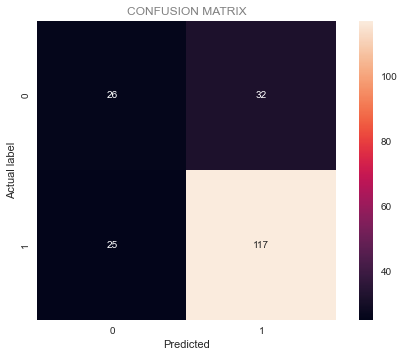

In [196]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True)
plt.ylabel('Actual label'),
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX",color = "grey")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [197]:
print ("\n Classification report : \n",classification_report(y_test,y_pred))
print ("Accuracy Score   : ",accuracy_score(y_test,y_pred))
model_roc_auc = roc_auc_score(y_test,y_pred) 
print ("Area under curve : ",model_roc_auc)


 Classification report : 
               precision    recall  f1-score   support

           0       0.51      0.45      0.48        58
           1       0.79      0.82      0.80       142

    accuracy                           0.71       200
   macro avg       0.65      0.64      0.64       200
weighted avg       0.71      0.71      0.71       200

Accuracy Score   :  0.715
Area under curve :  0.6361097620203983


In [198]:
# predict probabilities
pred_prob1 = classifier.predict_proba(X_test)


from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [199]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

print(auc_score1)

0.7388902379796016


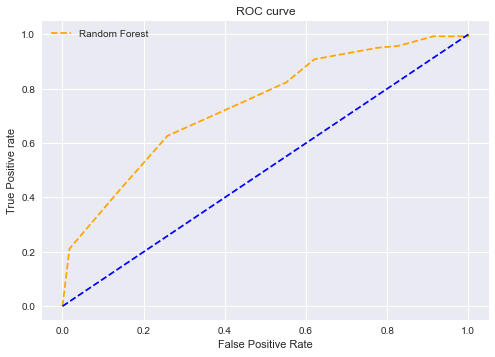

In [200]:
#ROC curve
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [146]:
# misclassification rate

from sklearn.metrics import accuracy_score

my_accuracy = 1-(accuracy_score(y_test, y_pred, normalize=False) / float(y_test.size))
my_accuracy

0.28500000000000003

# SVM

In [172]:
svm_reg = svm.SVC(kernel='linear')
svm_reg.fit(X_train, y_train)
y_svc_pred = svc_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_svc_pred))

Accuracy Score: 0.745


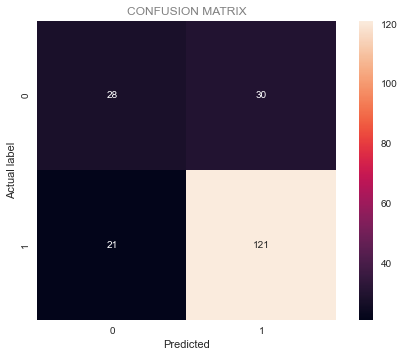

In [173]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_svc_pred)
sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True)
plt.ylabel('Actual label'),
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX",color = "grey")
tn, fp, fn, tp = confusion_matrix(y_test, y_svc_pred).ravel()

In [152]:
print ("\n Classification report : \n",classification_report(y_test,y_svc_pred))
print ("Accuracy Score   : ",accuracy_score(y_test,y_svc_pred))
model_roc_auc = roc_auc_score(y_test,y_svc_pred) 
print ("Area under curve : ",model_roc_auc)


 Classification report : 
               precision    recall  f1-score   support

           0       0.57      0.48      0.52        58
           1       0.80      0.85      0.83       142

    accuracy                           0.74       200
   macro avg       0.69      0.67      0.67       200
weighted avg       0.73      0.74      0.74       200

Accuracy Score   :  0.745
Area under curve :  0.6674356483729966


In [161]:
# misclassification rate

from sklearn.metrics import accuracy_score

my_accuracy = 1-(accuracy_score(y_test, y_svc_pred, normalize=False) / float(y_test.size))
my_accuracy

0.255

# XGBoost

In [158]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(accuracy_score(y_test, y_pred_xgb))

0.755


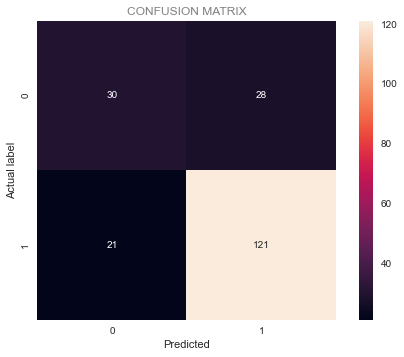

In [159]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True)
plt.ylabel('Actual label'),
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX",color = "grey")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_xgb).ravel()

In [160]:
print ("\n Classification report : \n",classification_report(y_test,y_pred_xgb))
print ("Accuracy Score   : ",accuracy_score(y_test,y_pred_xgb))
model_roc_auc = roc_auc_score(y_test,y_pred_xgb) 
print ("Area under curve : ",model_roc_auc)


 Classification report : 
               precision    recall  f1-score   support

           0       0.59      0.52      0.55        58
           1       0.81      0.85      0.83       142

    accuracy                           0.76       200
   macro avg       0.70      0.68      0.69       200
weighted avg       0.75      0.76      0.75       200

Accuracy Score   :  0.755
Area under curve :  0.6846770276833414


In [162]:
# misclassification rate

from sklearn.metrics import accuracy_score

my_accuracy = 1-(accuracy_score(y_test, y_pred_xgb, normalize=False) / float(y_test.size))
my_accuracy

0.245

In [163]:
# predict probabilities
pred_prob1 = xgb.predict_proba(X_test)


from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [164]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

print(auc_score1)

0.7119961146187469


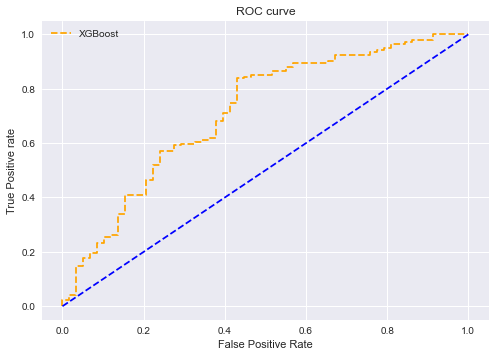

In [166]:
#ROC curve
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='XGBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();